# Project 2: Housing Price Prediction


The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class.
The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.



Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.



Be sure to go through the whole data science process and document as such in your Jupyter notebook.



This project will have less direct "To Do" guidance and the progression through the data science process will be more individualized this time around.
We will talk about all the issues during class so you're not going to be out on a ledge with this one, I just want to move you towards performing a data science project on your own eventually.



A data dictionary file is available at AWS S3 at [Housing Data Dictionary]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf ).

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .


##Problem Definition

The goal is to minimize the RMSpercentage error on my prediction of the house sales price. I want to minimize the set of variables that will keep do the job of minimizing the RMSpercentage error.

##Data Collection/Sources

###Data Overview
The data comes from [AWS](https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv)

The dataset will be viewed to assess the structure and content in order to clean, train, test, fit the model.
There are:
- 81 columns "Predictors"
- 2637 observations
- dtypes: float64(11), int64(27), object(43)

The above information will likely be reduced as I move the data through the process.

###Imports

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

###File Paths

In [2]:
base_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv '

###Load Data

In [3]:
housing_orig = pd.read_csv(base_path)
housing_orig.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [4]:
resultsss = (housing_orig['SalePrice'] > 500000).sum()
resultsss

13

In [5]:
housing_orig.shape

(2637, 81)

In [6]:
housing_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [7]:
housing_orig.tail()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000
2636,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000


The data looks to be consistant according to the head and the tail of the df. We can continue with the Data Cleaning process.

 ##Data Cleaning
I will look at the data to determine the MVP and also to establish a baseline CV   using RMSP

###Drop Column
First I will look at only the floats indicated by the housing_orig.info() above and drop all other columns/dtypes.
I will keep the target 'SalePrice' and refer to it by 'target'

In [8]:
# Pull out float data types
#create variable for target "SalePrice"
#dropped Lot Frontage because of it having a high correlation and Linear Regression is sensitive to highly correlation predictors
columns_dropped = ['Lot Frontage', 'Garage Cars']
housing_copy = housing_orig.drop(columns = columns_dropped, axis=1).copy()
housing_orig_float = housing_copy.select_dtypes(include='float64')
housing_obj_type = housing_copy.select_dtypes(include = 'object')
housing_int64_type = housing_copy.select_dtypes(include = 'int64')
housing_int64_type = housing_int64_type.drop(columns=['SalePrice', 'PID'])
target = housing_copy['SalePrice']
housing_combined = pd.concat([housing_orig_float, target], axis=1)
housing_combined = pd.concat([housing_combined, housing_int64_type], axis=1)
#dropping all rows that contain null values this is my second run of taking care of nulls
housing_clean = housing_combined.dropna()

housing_clean.head()
#housing_obj_type.head()
#housing_int64_type.info()
housing_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2466 entries, 0 to 2636
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mas Vnr Area     2466 non-null   float64
 1   BsmtFin SF 1     2466 non-null   float64
 2   BsmtFin SF 2     2466 non-null   float64
 3   Bsmt Unf SF      2466 non-null   float64
 4   Total Bsmt SF    2466 non-null   float64
 5   Bsmt Full Bath   2466 non-null   float64
 6   Bsmt Half Bath   2466 non-null   float64
 7   Garage Yr Blt    2466 non-null   float64
 8   Garage Area      2466 non-null   float64
 9   SalePrice        2466 non-null   int64  
 10  MS SubClass      2466 non-null   int64  
 11  Lot Area         2466 non-null   int64  
 12  Overall Qual     2466 non-null   int64  
 13  Overall Cond     2466 non-null   int64  
 14  Year Built       2466 non-null   int64  
 15  Year Remod/Add   2466 non-null   int64  
 16  1st Flr SF       2466 non-null   int64  
 17  2nd Flr SF       24

In [9]:
housing_clean.shape

(2466, 35)

loot at values and determine if they are continous or discrete. Consider Dropping the columns of the discrete values and only keep the continuous values.
Here is where I need to consider the highly correlated predictors with the target. ?????

In [10]:
#housing_combined['Bsmt Full Bath'].unique()
#housing_combined['Bsmt Half Bath'].unique()
#housing_combined['Garage Cars'].unique()

#housing_combined.drop('Bsmt Full Bath', axis=1, inplace=True)
#housing_combined.drop('Bsmt Half Bath', axis=1, inplace=True)
#housing_combined.drop('Garage Cars', axis=1, inplace=True)

###Check for null values

In [11]:
housing_clean.isna().sum().sum()

0

In [12]:
housing_clean.isna().sum()
percent_nulls_obj_type = (housing_obj_type.isna().sum())/ housing_obj_type.shape[0] *100
percent_nulls_obj_type

MS Zoning          0.000000
Street             0.000000
Alley             93.174061
Lot Shape          0.000000
Land Contour       0.000000
Utilities          0.000000
Lot Config         0.000000
Land Slope         0.000000
Neighborhood       0.000000
Condition 1        0.000000
Condition 2        0.000000
Bldg Type          0.000000
House Style        0.000000
Roof Style         0.000000
Roof Matl          0.000000
Exterior 1st       0.000000
Exterior 2nd       0.000000
Mas Vnr Type      60.940463
Exter Qual         0.000000
Exter Cond         0.000000
Foundation         0.000000
Bsmt Qual          2.768297
Bsmt Cond          2.768297
Bsmt Exposure      2.882063
BsmtFin Type 1     2.768297
BsmtFin Type 2     2.806219
Heating            0.000000
Heating QC         0.000000
Central Air        0.000000
Electrical         0.000000
Kitchen Qual       0.000000
Functional         0.000000
Fireplace Qu      48.691695
Garage Type        5.498673
Garage Finish      5.574516
Garage Qual        5

deal with the nulls, I'm going to use the mean to replace the nulls Second go Im going to just drop the rows that have nulls.

In [13]:
# mean_dict = {}
# for column in housing_combined.columns:
#   if housing_combined[column].isna().sum() > 0:
#     mean_value = housing_combined[column].mean()
#     housing_combined[column].fillna(value=mean_value, inplace = True)
#     mean_dict[column] = mean_value
# print(mean_dict)

In [14]:
housing_clean.dtypes.sort_values()

2nd Flr SF           int64
Gr Liv Area          int64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Low Qual Fin SF      int64
Fireplaces           int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Wood Deck SF         int64
Mo Sold              int64
Yr Sold              int64
Year Remod/Add       int64
Year Built           int64
Overall Cond         int64
Overall Qual         int64
Lot Area             int64
MS SubClass          int64
SalePrice            int64
1st Flr SF           int64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Garage Yr Blt      float64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Garage Area        float64
Total Bsmt SF      float64
Mas Vnr Area       float64
dtype: object

Here is where I dropped all the columns that have nulls greater than 50% of the column from the housing_obj_type df

In [15]:
columns_to_drop = percent_nulls_obj_type[percent_nulls_obj_type > 50].index
housing_obj_type.drop(columns=columns_to_drop, inplace=True)

columns_to_drop

Index(['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature'], dtype='object')

In [16]:
housing_obj_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2637 non-null   object
 1   Street          2637 non-null   object
 2   Lot Shape       2637 non-null   object
 3   Land Contour    2637 non-null   object
 4   Utilities       2637 non-null   object
 5   Lot Config      2637 non-null   object
 6   Land Slope      2637 non-null   object
 7   Neighborhood    2637 non-null   object
 8   Condition 1     2637 non-null   object
 9   Condition 2     2637 non-null   object
 10  Bldg Type       2637 non-null   object
 11  House Style     2637 non-null   object
 12  Roof Style      2637 non-null   object
 13  Roof Matl       2637 non-null   object
 14  Exterior 1st    2637 non-null   object
 15  Exterior 2nd    2637 non-null   object
 16  Exter Qual      2637 non-null   object
 17  Exter Cond      2637 non-null   object
 18  Foundati

In [17]:
housing_obj_type.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,...,TA,Typ,NaN,Detchd,Unf,TA,TA,N,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,Typ,NaN,CarPort,Unf,TA,TA,Y,WD,Normal
2,RM,Pave,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,P,WD,Normal
3,FV,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,...,Gd,Typ,NaN,Detchd,RFn,TA,TA,Y,WD,Normal


In [18]:
housing_int64_type.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,...,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,20,14299,4,3,1964,1964,1005,0,0,1005,...,0,0,0,0,0,0,0,0,7,2007
1,90,10791,4,5,1967,1967,1296,0,0,1296,...,0,0,0,0,0,0,0,500,10,2006
2,50,9000,6,6,1937,1950,780,595,0,1375,...,1,0,162,0,0,126,0,0,12,2007
3,60,7379,8,5,2000,2000,975,873,0,1848,...,1,280,184,0,0,0,0,0,4,2010
4,70,7200,7,9,1936,2007,575,560,0,1135,...,0,256,0,0,0,0,0,0,4,2009


###Check target values

In [19]:
housing_clean['SalePrice'].value_counts()

SalePrice
140000    31
135000    29
130000    26
155000    24
145000    21
          ..
295000     1
281500     1
279700     1
138887     1
211500     1
Name: count, Length: 936, dtype: int64

##Exploratory Data Analysis

###Feature Correlation
We will see the feature correlation on the df that has 11 predictors and 1 target

In [20]:
# sns.set()
# sns.pairplot(housing_clean);

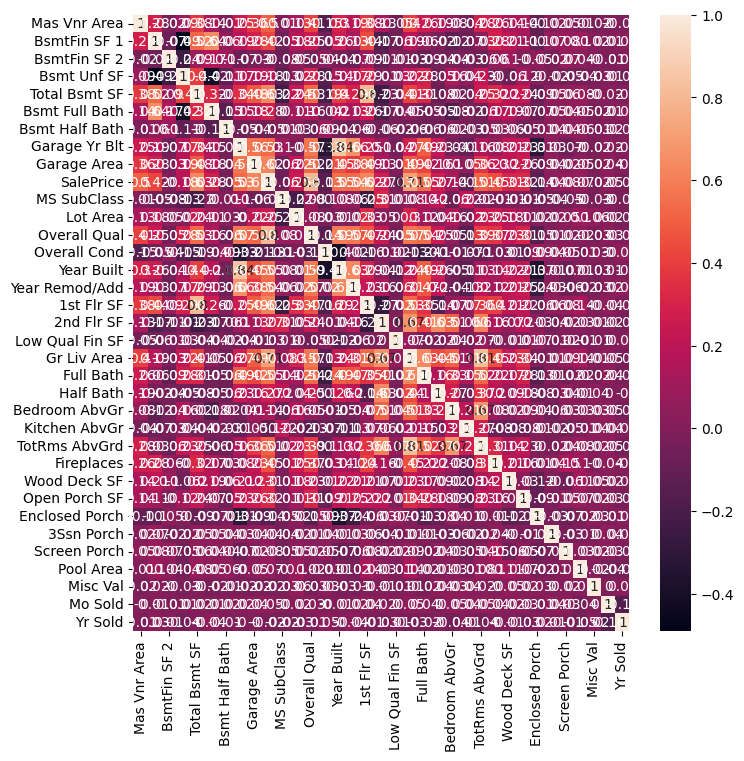

In [21]:
# Let's take a look at a correlation plot
plt.figure(figsize=(8,8))
correlation_matrix = housing_clean.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) ;

create a list of the most highly correlated.

In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

corrs = housing_clean.corr().round(2).unstack().abs()
corrs = corrs[corrs < 1]
corrs.sort_values(ascending = False)[::2]

Garage Yr Blt    Year Built         0.84
TotRms AbvGrd    Gr Liv Area        0.81
Total Bsmt SF    1st Flr SF         0.80
SalePrice        Overall Qual       0.80
Gr Liv Area      SalePrice          0.71
2nd Flr SF       Gr Liv Area        0.67
TotRms AbvGrd    Bedroom AbvGr      0.67
Year Remod/Add   Garage Yr Blt      0.66
BsmtFin SF 1     Bsmt Full Bath     0.64
Year Built       Year Remod/Add     0.63
Total Bsmt SF    SalePrice          0.63
Half Bath        2nd Flr SF         0.63
Year Remod/Add   Year Built         0.63
SalePrice        Garage Area        0.62
                 1st Flr SF         0.62
2nd Flr SF       TotRms AbvGrd      0.60
Year Built       Overall Qual       0.59
Year Remod/Add   Overall Qual       0.57
Overall Qual     Year Remod/Add     0.57
Gr Liv Area      Overall Qual       0.57
Garage Yr Blt    Garage Area        0.56
Full Bath        SalePrice          0.55
Year Built       SalePrice          0.55
Overall Qual     Full Bath          0.54
Full Bath       

In [23]:
corr_series = correlation_matrix.abs().unstack()
lt_df = (
  corr_series[ ( 0.50 < corr_series ) & ( corr_series < 1 )]
    .sort_values( ascending=False)
    .drop_duplicates()
    .to_frame()
    .rename( columns={0:"A"} )
    .sort_values( by = "A", ascending=False )
    .reset_index()
)
high_corrs = pd.concat([lt_df["level_0"], lt_df["level_1"]]).value_counts().index
high_corrs

Index(['Overall Qual', 'Gr Liv Area', 'SalePrice', 'Garage Yr Blt',
       'TotRms AbvGrd', '2nd Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'BsmtFin SF 1', 'Half Bath', 'Garage Area',
       'Total Bsmt SF', 'Bsmt Full Bath', '1st Flr SF', 'Bedroom AbvGr'],
      dtype='object')

In [24]:
lt_df

,level_0,level_1,A
0,Year Built,Garage Yr Blt,0.84
1,TotRms AbvGrd,Gr Liv Area,0.81
2,Overall Qual,SalePrice,0.80
3,Gr Liv Area,SalePrice,0.71
4,Gr Liv Area,2nd Flr SF,0.67
5,Year Remod/Add,Garage Yr Blt,0.66
6,BsmtFin SF 1,Bsmt Full Bath,0.64
7,Half Bath,2nd Flr SF,0.63
8,SalePrice,1st Flr SF,0.62
9,2nd Flr SF,TotRms AbvGrd,0.60


Plot the lower triangle

In [25]:
lower_triangle = np.tril(abs(correlation_matrix)+1.1, k=-1)-1.1
lower_triangle_df  = pd.DataFrame(lower_triangle, index=correlation_matrix.index, columns=correlation_matrix.columns)
lt_df = (
  lower_triangle_df
    .unstack()
    .to_frame()
    .rename( columns={0:"A"} )
    .query( "A > 0.92")
    .sort_values( by = "A", ascending=False )
    .reset_index()
)
high_corrs = pd.concat([lt_df["level_0"], lt_df["level_1"]]).value_counts().index
high_corrs

Index([], dtype='object')

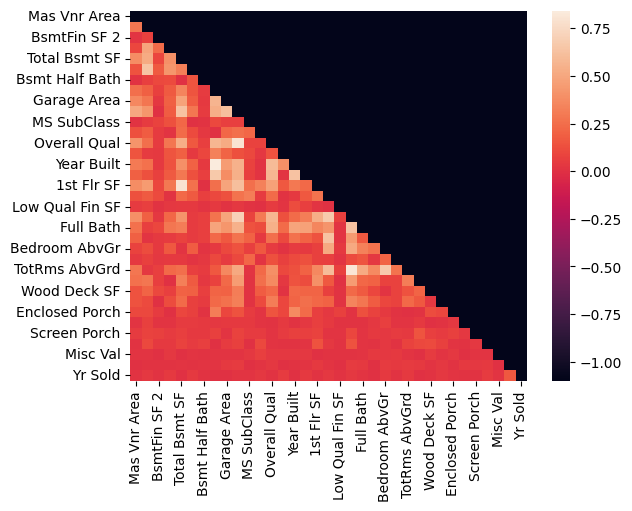

In [26]:
sns.heatmap(data=lower_triangle_df, annot=False) ;

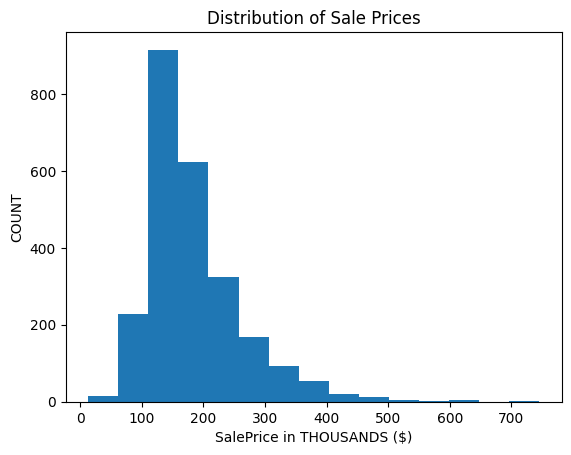

In [27]:
# Let's look at the distribution of SalePrice
plt.hist(housing_clean['SalePrice']/1000, bins=15)
plt.xlabel('SalePrice in THOUSANDS ($)')
plt.ylabel('COUNT')
plt.title('Distribution of Sale Prices')
plt.savefig('test.png')
plt.show()

In [28]:
# Let's look at a scatterplot of "SalePrice", and "Garage Cars"
# housing_clean.plot('SalePrice', 'Garage Cars', kind = 'scatter')

In [29]:
housing_clean.isnull().sum()

Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Bsmt Full Bath     0
Bsmt Half Bath     0
Garage Yr Blt      0
Garage Area        0
SalePrice          0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
dtype: int64

##Data Processing

###One Hot Encoding

In [30]:
# col = housing_int64_type.columns
# nominal_int64 = (
#     ['MS SubClass ', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood',
#      'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1',
#      'Exterior 2', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type'])
# housing_int64_type.head()
# #housing_int64_type['Street'].unique()
# housing_int64_type.columns
# housing_int64_type['Half Bath']


###Linear Regression
Go back to top in the drop columns section and drop garage cars

In [31]:
# First we will break up our data into training and testing sets
X = housing_clean.drop(['SalePrice'], axis = 1).copy()
X2 = sm.add_constant(X) # add constant so that intercept is estimated
y = housing_clean['SalePrice']

# normalize the features
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.58549292,  0.13695453,  0.50941401, ..., -0.10306272,
         0.27779784, -0.60567679],
       [-0.58549292, -1.0001159 , -0.30368472, ...,  1.15850375,
         1.38509761, -1.37044841],
       [-0.58549292, -1.0001159 , -0.30368472, ..., -0.10306272,
         2.12329746, -0.60567679],
       ...,
       [-0.58549292,  1.12773519, -0.30368472, ..., -0.10306272,
         1.01599769,  0.92386644],
       [ 0.36478394, -1.0001159 , -0.30368472, ..., -0.10306272,
         0.64689776,  0.92386644],
       [-0.58549292,  0.92824915, -0.30368472, ..., -0.10306272,
        -0.46040202,  0.15909483]])

In [32]:
X.columns

Index(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt',
       'Garage Area', 'MS SubClass', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold'],
      dtype='object')

In [33]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=5)

In [34]:
# Fit a linear model using statsmodels
# myfit = sm.OLS(y_train, X_train).fit()
# myfit.summary()

In [35]:
X.head()

,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Area,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,0.0,513.0,144.0,348.0,1005.0,1.0,0.0,1964.0,440.0,20,14299,4,3,1964,1964,1005,0,0,1005,1,0,3,1,5,0,0,0,0,0,0,0,0,7,2007
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,516.0,90,10791,4,5,1967,1967,1296,0,0,1296,2,0,2,2,6,0,0,0,0,0,0,0,500,10,2006
2,0.0,0.0,0.0,780.0,780.0,0.0,0.0,1979.0,544.0,50,9000,6,6,1937,1950,780,595,0,1375,1,1,3,1,6,1,0,162,0,0,126,0,0,12,2007
3,0.0,484.0,0.0,491.0,975.0,1.0,0.0,2000.0,592.0,60,7379,8,5,2000,2000,975,873,0,1848,2,1,3,1,7,1,280,184,0,0,0,0,0,4,2010
4,0.0,350.0,210.0,0.0,560.0,1.0,0.0,1971.0,576.0,70,7200,7,9,1936,2007,575,560,0,1135,1,0,3,1,6,0,256,0,0,0,0,0,0,4,2009


In [36]:
X_scaled.head()
#X_scaled.isnull().sum()

,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Area,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,-0.585493,0.136955,0.509414,-0.473099,-0.127763,1.079673,-0.250042,-0.555428,-0.312280,-0.880553,0.605440,-1.578410,-2.392527,-0.294780,-1.000847,-0.424474,-0.792408,-0.088136,-1.028568,-1.037244,-0.782347,0.187332,-0.183324,-0.949190,-0.959677,-0.762581,-0.731718,-0.360856,-0.103945,-0.291755,-0.062703,-0.103063,0.277798,-0.605677
1,-0.585493,-1.000116,-0.303685,-1.270622,-2.486719,-0.845470,-0.250042,-0.435540,0.097823,0.815320,0.092745,-1.578410,-0.543586,-0.192779,-0.855523,0.342427,-0.792408,-0.088136,-0.436263,0.793711,-0.782347,-1.071415,5.198544,-0.300436,-0.959677,-0.762581,-0.731718,-0.360856,-0.103945,-0.291755,-0.062703,1.158504,1.385098,-1.370448
2,-0.585493,-1.000116,-0.303685,0.516930,-0.655887,-0.845470,-0.250042,0.044014,0.248914,-0.153751,-0.169010,-0.127391,0.380885,-1.212788,-1.679026,-1.017439,0.591656,-0.088136,-0.275466,-1.037244,1.204541,0.187332,-0.183324,-0.300436,0.572080,-0.762581,1.784751,-0.360856,-0.103945,1.904774,-0.062703,-0.103063,2.123297,-0.605677
3,-0.585493,0.072676,-0.303685,-0.145381,-0.198179,1.079673,-0.250042,0.883234,0.507927,0.088517,-0.405919,1.323628,-0.543586,0.929231,0.743043,-0.503536,1.238328,-0.088136,0.687284,0.793711,1.204541,0.187332,-0.183324,0.348317,0.572080,1.413071,2.126494,-0.360856,-0.103945,-0.291755,-0.062703,-0.103063,-0.829502,1.688638
4,-0.585493,-0.224337,0.882084,-1.270622,-1.172275,1.079673,-0.250042,-0.275688,0.421589,0.330785,-0.432080,0.598119,3.154297,-1.246788,1.082133,-1.557696,0.510241,-0.088136,-0.763964,-1.037244,-0.782347,0.187332,-0.183324,-0.300436,-0.959677,1.226586,-0.731718,-0.360856,-0.103945,-0.291755,-0.062703,-0.103063,-0.829502,0.923866


In [37]:
# Fit a linear model using Sklearn
model = LinearRegression()

#my_fit_lr = model.fit(X_train, y_train)
myfit2 = model.fit(X_train, y_train)

(
myfit2.intercept_,
myfit2.coef_
)


(184104.53406599435,
 array([ 5.55755802e+03, -1.65852726e+15, -6.51046218e+14, -1.60408904e+15,
         1.56616981e+15,  3.77419676e+03,  2.40456773e+02, -1.79805508e+02,
         6.53618238e+03, -6.71198148e+03,  1.72973481e+03,  2.66850097e+04,
         3.43923187e+03,  1.01424720e+04,  3.70641907e+03,  4.30072618e+16,
         4.87246718e+16,  4.65427090e+15, -5.56847100e+16,  9.95041081e+02,
        -1.39397208e+03, -6.48118675e+03, -3.79344668e+03,  6.45991662e+03,
         1.74878813e+03,  2.91912688e+03, -1.45924683e+03,  8.88415299e+02,
         4.77459952e+02,  2.58719022e+03, -2.56299594e+03, -2.19450368e+02,
         9.74471113e+02, -1.33008203e+03]))

In [38]:
# Create a data frame with the results from the linear regression models
model_results = pd.DataFrame()
model_results['Predictor'] = X_train.columns
model_results['Linear'] = myfit2.coef_
model_results.sort_values(by=['Linear'],inplace=True, ascending=False)
model_results

,Predictor,Linear
16,2nd Flr SF,4.872467e+16
15,1st Flr SF,4.300726e+16
17,Low Qual Fin SF,4.654271e+15
4,Total Bsmt SF,1.566170e+15
11,Overall Qual,2.668501e+04
13,Year Built,1.014247e+04
8,Garage Area,6.536182e+03
23,TotRms AbvGrd,6.459917e+03
0,Mas Vnr Area,5.557558e+03
5,Bsmt Full Bath,3.774197e+03


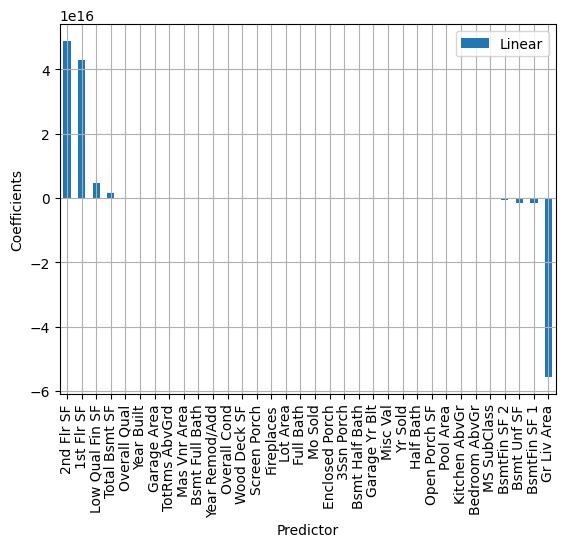

In [39]:
# We can even plot the coefficients if we want to!
model_results.plot(x = 'Predictor', y = 'Linear', kind = 'bar')
plt.xlabel('Predictor')
plt.ylabel('Coefficients')
plt.grid()

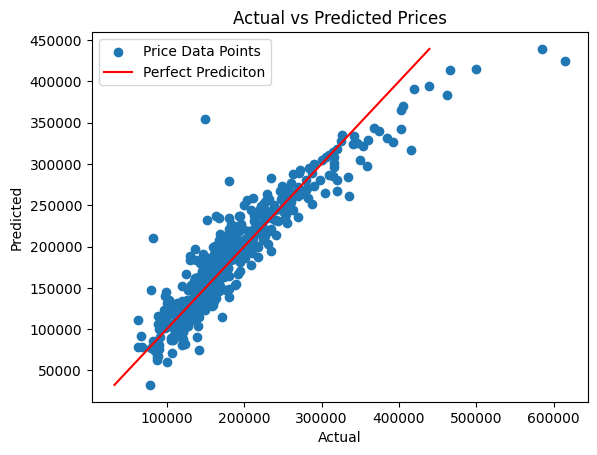

In [40]:
# See how well our model performs on our test data
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred, label = 'Price Data Points')
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red', label = "Perfect Prediciton")
plt.xlabel('Actual')
plt.ylabel('Predicted');
plt.title('Actual vs Predicted Prices')
plt.legend()

###Residual Analysis

Text(0, 0.5, 'Sample Quantiles')

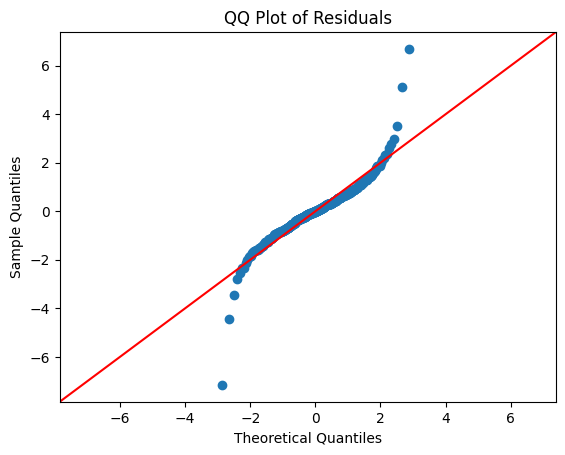

In [41]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

In [42]:
# Calculate CV RMSE
results = cross_val_score(
    model,
    X_scaled,
    y,
    scoring='neg_root_mean_squared_error',
    cv = 10
    )
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

# I need the RMS percentage error ( root mean squared percentage error - RMSPE ) NOT THE RMSE

CV RMSE: 31976.911726169095


In [43]:
def rmspe(Y_test, Y_pred):
  return (np.sqrt(np.mean(np.square((Y_test - Y_pred) / Y_test))) * 100)

In [ ]:
#Authored by Joeseph Olonia
n = 1000
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = rmspe(y_test,y_pred)
print(f"CV RMSPE: {results.mean().round(2)}%")
print(f"Number of Predictors: {sum(model.coef_>0)}")

##Data Visualization

##Conclusion

The data presented, I was able to create a baseline by removing highly correlated predictors in addition to removing rows of nulls to have a clean data set. In only looking at the floats and the target I have a
RMSPE of 35.06% with 5 predictors.
I will start to onehot encode and work with the remaining predictors to assess its impact.